In [1]:
import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader

import numpy as np

# Creating Dataset and DataLoaders

In [2]:
class Products(Dataset):
  def __init__(self,N):
    super(Products, self).__init__()
    self.N = N
    A = torch.rand(N)
    B = torch.rand(N)
    self.X = torch.tensor(list(zip(A,B)))
    self.P = (A*B).reshape(-1,1)
  
  def __len__(self):
    return len(self.P)
  def __getitem__(self,idx):
    return (self.X[idx], self.P[idx])
  
  def shapes(self):
    print("A shape:", self.A.shape)
    print("B shape:", self.B.shape)
    print("P shape:", self.P.shape)

In [3]:
train_data = Products(100000)
val_data = Products(1000)
test_data = Products(5000)

In [4]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

val_loader = DataLoader(val_data, batch_size=128, shuffle=True)

test_loader = DataLoader(test_data, batch_size=128, shuffle=True)

# Create Model

In [5]:
class Multiplier(nn.Module):
  def __init__(self):
    super(Multiplier,self).__init__()
    
    self.network = nn.Sequential(
      nn.Linear(in_features=2, out_features=64, bias=True),
      nn.LeakyReLU(),
      nn.Linear(in_features=64, out_features=128, bias=True),
      nn.LeakyReLU(),
      nn.Linear(in_features=128, out_features=32, bias=True),
      nn.LeakyReLU(),
      nn.Linear(in_features=32, out_features=1, bias=True),
      nn.LeakyReLU(),
    )
  
  def forward(self, x):
    h = self.network(x)
    return h

model = Multiplier()
print(model)

Multiplier(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=128, out_features=32, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
  )
)


# Train Model

In [6]:
lr = 0.01

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
print("Optimizer:", optimizer)

Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [7]:
# X,Y = next(iter(train_loader))
# X[0]
# len(val_loader)

In [8]:
n_epoch = 60
total_train_loss = []
total_val_loss = []

from tqdm import tqdm

for epoch in tqdm(range(n_epoch)):
  train_loss = 0
  for X, Y in train_loader:
    #clear the gradients
    optimizer.zero_grad()
    #predict
    y_pred = model.forward(X)
    #calculate loss
    loss = loss_fn(y_pred, Y)
    #calculate gradients
    loss.backward()
    #update parameters
    optimizer.step()
    
    #record keeping
    train_loss += loss.item()
  train_loss = train_loss/len(train_loader)
  total_train_loss.append(train_loss)
  
  #validation
  val_loss = 0
  for X, Y in val_loader:
    #predict
    y_pred = model.forward(X)
    #calculate loss
    loss = loss_fn(y_pred, Y)
    
    #record keeping
    val_loss += loss.item()
  val_loss = val_loss/len(val_loader)
  total_val_loss.append(val_loss)
  # print(f'Epoch={epoch}/{n_epoch}\t Train loss={train_loss}\t Val loss={val_loss}')

100%|█████████████████████████████████████████| 100/100 [02:26<00:00,  1.46s/it]


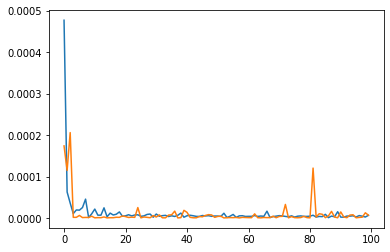

In [9]:
import matplotlib.pyplot as plt

plt.plot(total_train_loss)
plt.plot(total_val_loss)

# Test

In [11]:
total_loss = 0

for X, Y in test_loader:
  #predict
  y_pred = model.forward(X)
  #calculate loss
  loss = loss_fn(y_pred, Y)

  #record keeping
  total_loss += loss.item()

total_loss = total_loss/len(test_loader)
print("Average test loss = ",total_loss)

Average test loss =  7.4819269684667235e-06


In [18]:
model.forward(torch.tensor([0.1,0.9]))

tensor([0.0920], grad_fn=<LeakyReluBackward0>)